In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/garbage-classification/one-indexed-files-notrash_val.txt
/kaggle/input/garbage-classification/one-indexed-files-notrash_train.txt
/kaggle/input/garbage-classification/zero-indexed-files.txt
/kaggle/input/garbage-classification/one-indexed-files.txt
/kaggle/input/garbage-classification/one-indexed-files-notrash_test.txt
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal375.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal341.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal374.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal383.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal215.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal113.jpg
/kaggle/input/garbage-classification/Garbage classifi

In [13]:
import tensorflow as tf

# Load images from dataset folder
dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/garbage-classification/Garbage classification/Garbage classification",
    image_size=(128, 128),
    batch_size=32
)
class_names = dataset.class_names
print(class_names)

Found 2527 files belonging to 6 classes.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [14]:
# Shuffle the dataset for randomness
np.random.seed(42)

dataset = dataset.shuffle(1000)

# Split into training and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalize pixel values

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),         # First conv layer
    tf.keras.layers.MaxPooling2D(),                                # Downsample

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),         # Second conv layer
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),                                     # Flatten before dense
    tf.keras.layers.Dense(64, activation='relu'),                  # Hidden layer
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/step - accuracy: 0.2791 - loss: 1.8553 - val_accuracy: 0.4980 - val_loss: 1.3161
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 446ms/step - accuracy: 0.5019 - loss: 1.2988 - val_accuracy: 0.6348 - val_loss: 1.1544
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 449ms/step - accuracy: 0.5651 - loss: 1.1093 - val_accuracy: 0.6309 - val_loss: 0.9365
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 464ms/step - accuracy: 0.6707 - loss: 0.9170 - val_accuracy: 0.6849 - val_loss: 0.8224
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 453ms/step - accuracy: 0.7109 - loss: 0.7859 - val_accuracy: 0.7559 - val_loss: 0.6775
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 486ms/step - accuracy: 0.7678 - loss: 0.6419 - val_accuracy: 0.7949 - val_loss: 0.5770
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 463ms/step - accuracy: 0.8326 - loss: 0.5180 - val_accuracy: 0.9061 - val_loss: 0.3568
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 453ms/step - accuracy: 0.8668 - loss: 0.3839 - val_accu

In [21]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load and prepare a test image
img = load_img("/kaggle/input/plastic/download (1).jpeg", target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: glass


In [22]:
import tensorflow as tf

# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/garbage-classification/Garbage classification/Garbage classification",
    image_size=(128, 128),
    batch_size=32
)
class_names = dataset.class_names

# Shuffle and split
dataset = dataset.shuffle(1000)
train_size = int(0.8 * len(dataset))
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

# ✅ Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# ✅ Model with Dropout
model = tf.keras.Sequential([
    data_augmentation,  # <-- Add augmentation here
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalize

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),  # <-- Dropout to reduce overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Found 2527 files belonging to 6 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 537ms/step - accuracy: 0.2381 - loss: 2.5091 - val_accuracy: 0.3601 - val_loss: 1.6429
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 514ms/step - accuracy: 0.3322 - loss: 1.5397 - val_accuracy: 0.4258 - val_loss: 1.3628
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 494ms/step - accuracy: 0.4256 - loss: 1.4138 - val_accuracy: 0.4853 - val_loss: 1.3331
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 518ms/step - accuracy: 0.4984 - loss: 1.2957 - val_accuracy: 0.5703 - val_loss: 1.1964
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 496ms/step - accuracy: 0.5293 - loss: 1.2374 - val_accuracy: 0.5312 - val_loss: 1.2790
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 504ms/step - accuracy: 0.5558 - loss: 1.2107 - val_accuracy: 0.5605 - val_loss: 1.1647
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 524ms/step - accuracy: 0.5674 - loss: 1.1235 - val_accuracy: 0.6191 - val_loss: 1.0347
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 509ms/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


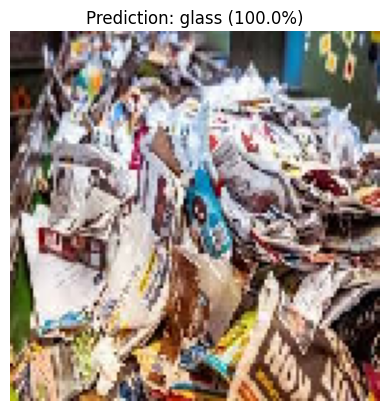

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your image
img_path = "/kaggle/input/images/download (3).jpeg"  # Change this to your image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize like training data

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * np.max(predictions[0]), 2)

# Show result
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} ({confidence}%)")
plt.axis("off")
plt.show()
